In [3]:
#dependencies
import pprint
import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#api key
api_key = "d77855c51a2f094a1174adf09b0ea42d"

from citipy import citipy

#output file
output_file = "../Desktop/weather.csv"

#latitudes and longitudes ranges
lng_range = (-90, 90)
lat_range = (-180, 180)

#temp units
temp_units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="
    
#count of pass throughs
count_one = 0
set_one = 1

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [10]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | teguise
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | quthing
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | chegdomyn
Processing Record 12 of Set 1 | manicore
Processing Record 13 of Set 1 | batagay-alyta
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sorong
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of Set 1 | lasa
Processing Record 24 of Set 1 | lebu
Processing Record 

Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | masterton
Processing Record 47 of Set 4 | faya
City not found. Skipping...
Processing Record 48 of Set 4 | voi
Processing Record 49 of Set 4 | huarmey
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | progreso
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | challapata
Processing Record 5 of Set 5 | mahon
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | chumikan
Processing Record 8 of Set 5 | kloulklubed
Processing Record 9 of Set 5 | luganville
Processing Record 10 of Set 5 | ancona
City not found. Skipping...
Processing Record 11 of Set 5 | bocana de paiwas
Processing Record 12 of Set 5 | awang
Processing Record 13 of Set 5 | luderitz
Processing Record 14 of Set 5 | grindavik
Processing Record 15 of Set 5 | huangchuan
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 5 | souillac
Processing Record 17 of Set 5 | qaa

Processing Record 30 of Set 8 | krasnovishersk
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | sondrio
Processing Record 34 of Set 8 | lucapa
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | vao
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | ikere
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | kirakira
Processing Record 44 of Set 8 | russell
Processing Record 45 of Set 8 | tarbagatay
Processing Record 46 of Set 8 | izhma
Processing Record 47 of Set 8 | vardo
Processing Record 48 of Set 8 | wajir
Processing Record 49 of Set 8 | ozu
Processing Record 1 of Set 9 | havre-saint-pierre
Processing Record 2 of Set 9 | vestmannaeyjar
Processing Record 3 of Set 9 | puqi
Processing Record 4 of Set 9 | vostok
Processing Record 5 of S

In [11]:
# dictionary for dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [14]:
# dataframe
weather_df = pd.DataFrame(weather_dict)

In [15]:
# show the top of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,0,ES,1580062335,67,36.59,-6.23,57.20,3.36
1,tuktoyaktuk,40,CA,1580062534,75,69.45,-133.04,-20.20,8.05
2,teguise,20,ES,1580062534,55,29.06,-13.56,66.20,13.87
3,kodiak,90,US,1580062534,56,57.79,-152.41,15.80,9.17
4,dikson,99,RU,1580062534,96,73.51,80.55,-3.95,2.57


In [17]:
# output data to csv
weather_df.to_csv(output_file)

In [18]:
weather_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [19]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,0,ES,1580062335,67,36.59,-6.23,57.20,3.36
1,tuktoyaktuk,40,CA,1580062534,75,69.45,-133.04,-20.20,8.05
2,teguise,20,ES,1580062534,55,29.06,-13.56,66.20,13.87
3,kodiak,90,US,1580062534,56,57.79,-152.41,15.80,9.17
4,dikson,99,RU,1580062534,96,73.51,80.55,-3.95,2.57


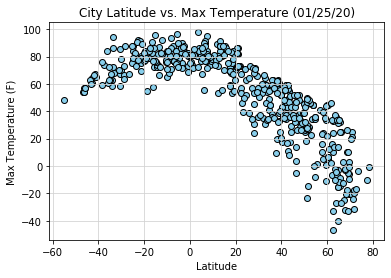

In [22]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Desktop/figure_1.png")
plt.show()

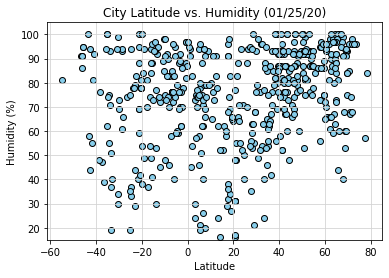

In [24]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Desktop/figure_2.png")
plt.show()

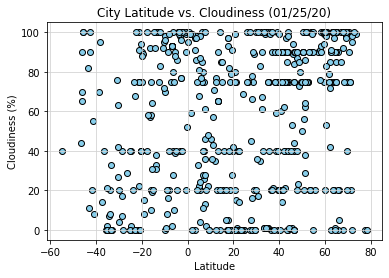

In [25]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Desktop/figure_3.png")
plt.show()

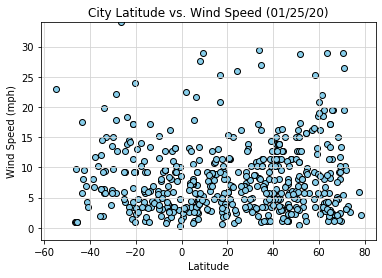

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Desktop/figure_4.png")
plt.show()

In [28]:
nothern = weather_dataframe.loc[weather_dataframe["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_dataframe.loc[weather_dataframe["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [31]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("../Desktop/figure_5.png")
    plt.show()

The r-squared is: -0.867560130382273


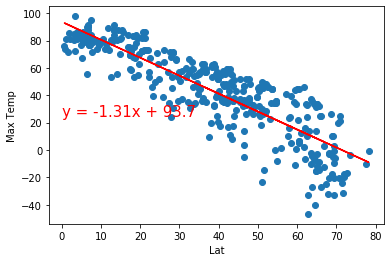

<Figure size 432x288 with 0 Axes>

In [49]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
plt.savefig("../Desktop/figure_6.png")
plt.show()

In [ ]:
# This graph shows a negative relationship between maximum temperature and latitude.  The r-squared value is close to -1.  Therefore, this regression accounts for most outliers.  This makes sense because the temperature lowers as one travels further from the equator. For example, the temperature in Anchorage, Alaska is far lower than Miami, Florida because Anchorage is further from the equator.

The r-squared is: 0.5810531481769126


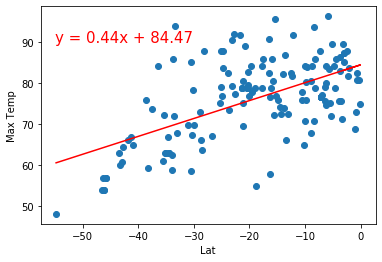

<Figure size 432x288 with 0 Axes>

In [41]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig("../Desktop/figure_7.png")

In [ ]:
#This graph is similar to the Northern Hemisphere.  Although, the r-squared value is not as close to 1 or -1.  Therefore, the causal relationship is not as reliable. 

The r-squared is: 0.4614239012459019


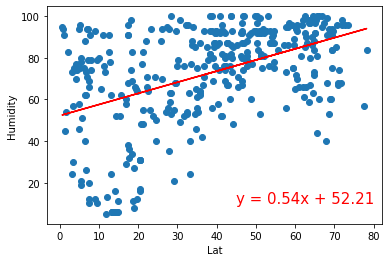

<Figure size 432x288 with 0 Axes>

In [42]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig("../Desktop/figure_8.png")

In [ ]:
#This graph shows the relationship between humidity and latitude in the Northern Hemishpere is not strong. 

The r-squared is: 0.10636631685882587


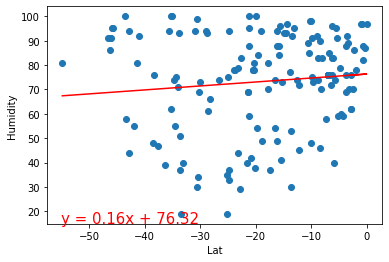

<Figure size 432x288 with 0 Axes>

In [43]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)
plt.savefig("../Desktop/figure_9.png")

In [ ]:
#Similar to the Northern Hemisphere, the relationship between humidity and latitude in the Southern Hemisphere is not strong. 

The r-squared is: 0.25744456229382645


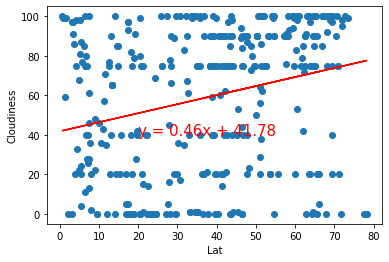

<Figure size 432x288 with 0 Axes>

In [44]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)
plt.savefig("../Desktop/figure_10.png")

In [ ]:
# There is a weak relationship between cloudiness and latitude in the Northern Hemisphere. 

The r-squared is: 0.32709828737705393


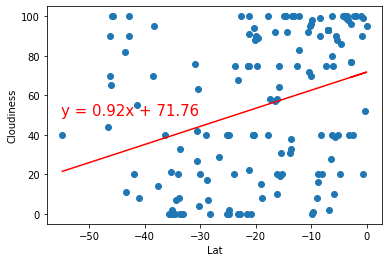

<Figure size 432x288 with 0 Axes>

In [45]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)
plt.savefig("../Desktop/figure_11.png")

In [ ]:
# Similarly, there is a weak relationship between cloudiness and latitude in the Southern Hemisphere. 

The r-squared is: 0.0834360176110557


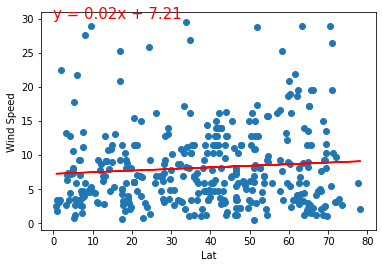

<Figure size 432x288 with 0 Axes>

In [46]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)
plt.savefig("../Desktop/figure_12.png")

In [ ]:
# There is almost no relationship between wind speed and latitude in the North Hemisphere. 

The r-squared is: -0.1444880726147866


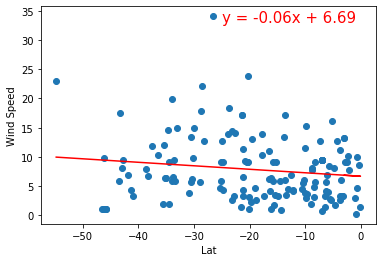

<Figure size 432x288 with 0 Axes>

In [47]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)
plt.savefig("../Desktop/figure_13.png")

In [ ]:
# The relationship between wind speed and latitude is slightly stronger in the Southern Hemisphere.  But the relationship is not strong enough to be a reliable predictor.